In [3]:
!apt-get install -y tesseract-ocr  # Install Tesseract OCR engine
!pip install pytesseract  # Install pytesseract Python wrapper


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,218 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Original Image:


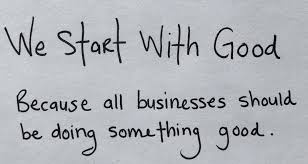

Preprocessed Image:


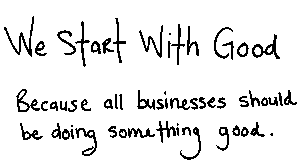

Image with Bounding Boxes Around Words:


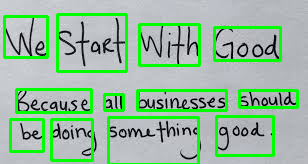

Detected Text:
\e Staet With Good

Gecause. all businesses should.

be doing Something geod.



In [16]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Set up Tesseract executable path (if needed, for local setups)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the image
image_path = "/content/images.jpeg"  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to read the image file.")
else:
    # Display the original image
    print("Original Image:")
    cv2_imshow(image)

    # Preprocess the image for better OCR results
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)  # Apply thresholding

    # Display the preprocessed image
    print("Preprocessed Image:")
    cv2_imshow(thresh)

    # Use Tesseract OCR to extract word-level bounding boxes
    # image_to_data returns detailed information about the detected text including bounding boxes
    data = pytesseract.image_to_data(thresh, output_type=pytesseract.Output.DICT)

    # Loop through the detected words and draw bounding boxes around them
    n_boxes = len(data['text'])
    for i in range(n_boxes):
        if int(data['conf'][i]) > 0:  # Confidence threshold to filter out weak detections
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            # Draw a rectangle around the word
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with bounding boxes around words
    print("Image with Bounding Boxes Around Words:")
    cv2_imshow(image)

    # Use Tesseract OCR to extract and print the detected text
    detected_text = pytesseract.image_to_string(thresh)
    print("Detected Text:")
    print(detected_text)
